<a href="https://colab.research.google.com/github/sfatimazahra/ML-Image-Classification-using-CIFAR-100/blob/main/EffNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.datasets import cifar100

from keras.applications import EfficientNetB0

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Implementing EfficientNet using Tensorflow

169001437/169001437 [==============================] - 3s 0us/step


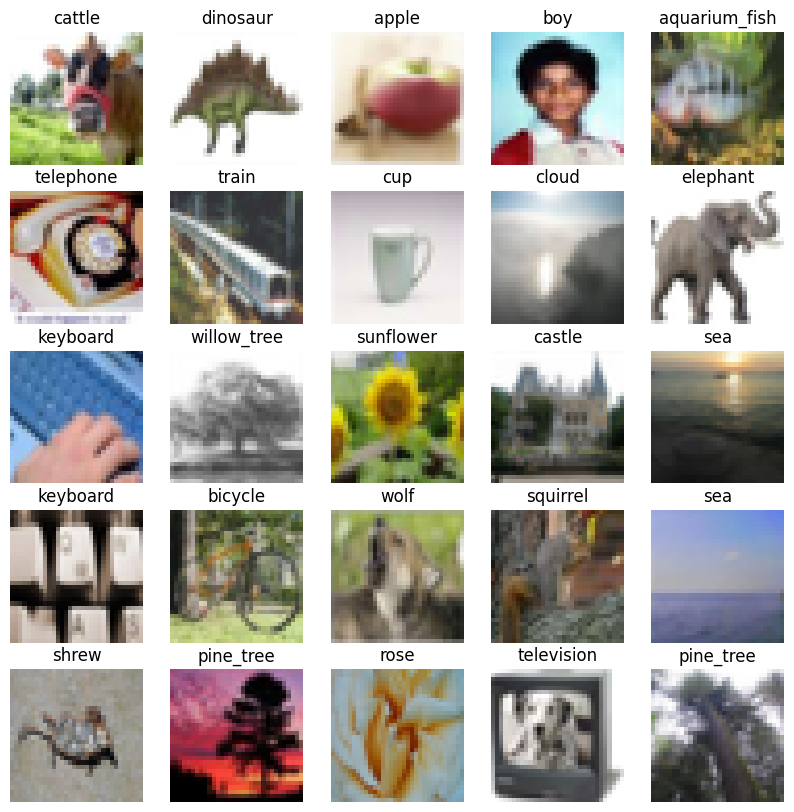

(32, 32, 3)


In [2]:
# Load CIFAR-100 dataset
batch_size = 128
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Split  into validation and test sets
x_testnew, x_val, y_testnew, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# x_train = np.array(x_train)
# x_val = np.array(x_val)
# x_test = np.array(x_test)
# y_train = np.array(y_train)
# y_val = np.array(y_val)
# y_test = np.array(y_test)

# Normalize pixel values to be between 0 and 1
# x_train, x_test = x_train / 255.0, x_test / 255.0


# Map class indices to class names
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.show()
print(x_train[0].shape)



In [10]:
# # Normalize the entire dataset
# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255
# x_val = x_val.astype('float32') / 255

# # Convert labels to one-hot encoded vectors
# y_train = to_categorical(y_train, 100)
# y_test = to_categorical(y_test, 100)
# y_val = to_categorical(y_val, 100)


Model

In [3]:
# Set the input shape for your model
input_shape = x_train[0].shape
num_classes = 100

# Define and compile the model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)
base_model.trainable = False

# Build the classification model on top of the backbone

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),  # Add your own layers as needed
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model from scratch
history_scratch = model.fit(
    x_train, y_train,
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model and report the best test accuracy
best_test_accuracy_scratch = max(history_scratch.history['val_accuracy'])
print(f'Best Test Accuracy (Transfer Learning): {best_test_accuracy_scratch}')


Epoch 1/50
1563/1563 [==============================] - ETA: 0s - loss: 3.4990 - accuracy: 0.1750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 48s 21ms/step - loss: 3.4990 - accuracy: 0.1750 - val_loss: 3.0535 - val_accuracy: 0.2474
Epoch 2/50
1563/1563 [==============================] - 21s 13ms/step - loss: 2.9798 - accuracy: 0.2600 - val_loss: 2.8853 - val_accuracy: 0.2764
Epoch 3/50
1563/1563 [==============================] - 19s 12ms/step - loss: 2.8310 - accuracy: 0.2904 - val_loss: 2.8143 - val_accuracy: 0.2930
Epoch 4/50
1563/1563 [==============================] - 27s 17ms/step - loss: 2.7390 - accuracy: 0.3107 - val_loss: 2.7736 - val_accuracy: 0.2994
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 2.6773 - accuracy: 0.3204 - val_loss: 2.7098 - val_accuracy: 0.3182
Epoch 6/50
1563/1563 [==============================] - 18s 12ms/step - loss: 2.6299 - accuracy: 0.3306 - val_loss: 2.7084 - val_accuracy: 0.3138
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 2.5844 - accuracy: 0.3419 - val_loss: 2.6854 - val_accura

Implementing EfficientnetV2 using Transfer Learning
Data Augementation


Image Augmentation

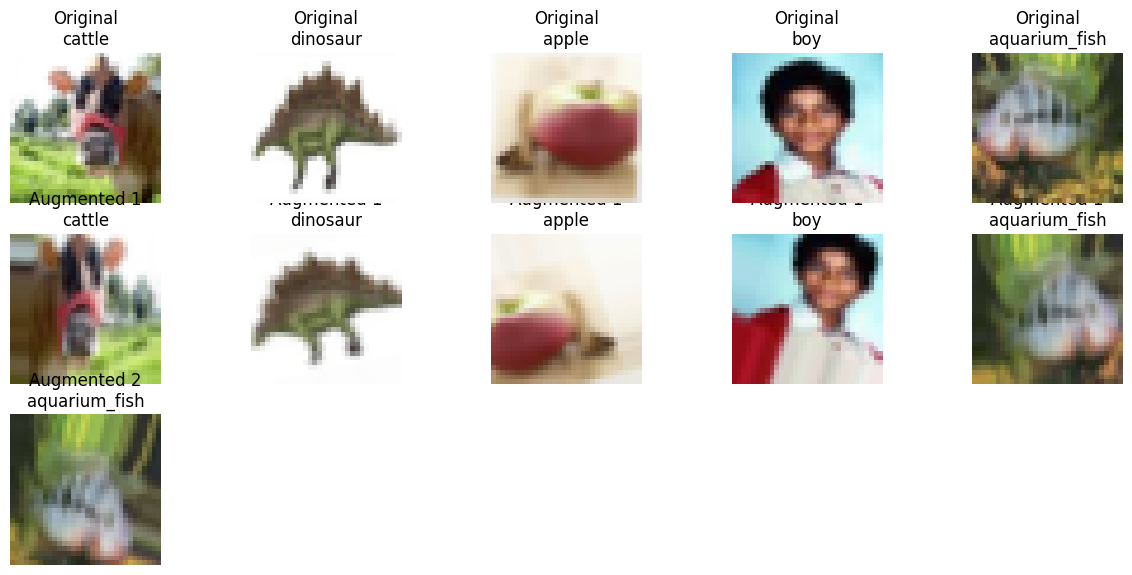

In [3]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment the entire training dataset
augmented_images = []
augmented_labels = []
for i in range(x_train.shape[0]):
    img = x_train[i]
    img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels) for flow method

    # Generate 3 augmented images per original image
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(y_train[i])

        if len(augmented_images) % 3 == 0:
            break  # Break after generating 3 augmented images per original image

# Convert the augmented images and labels lists to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Normalize the entire dataset
x_train_normalized = x_train.astype('float32') / 255
x_test_normalized = x_test.astype('float32') / 255
augmented_images_normalized = augmented_images.astype('float32') / 255


# Display a few original and augmented normalized images
plt.figure(figsize=(15, 9))
for i in range(5):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train_normalized[i])
    plt.title(f'Original\n{class_names[y_train[i][0]]}')
    plt.axis('off')

    for j in range(2):
        plt.subplot(4, 5, i + j + 6)
        plt.imshow(augmented_images_normalized[i * 3 + j])
        plt.title(f'Augmented {j+1}\n{class_names[augmented_labels[i * 3 + j][0]]}')
        plt.axis('off')

plt.show()


Running Model


In [ ]:
print('Dataset before augmentation: ', len(x_train))
print('Labels before augmentation: ', len(y_train))
print('Dataset after augmentation: ', len(augmented_images))
print('Labels after augmentation: ', len(augmented_labels))

Dataset before augmentation:  50000
Labels before augmentation:  50000
Dataset after augmentation:  150000
Labels after augmentation:  150000


In [14]:
# Set the input shape for your model
# input_shape = augmented_images_normalized[0].shape
input_shape = x_train[0].shape

num_classes = 100

# Define and compile the model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2M(
            include_top= False,
            weights= 'imagenet',
            input_shape= input_shape,
            classes= num_classes,
)

base_model.trainable = False


# base_model.trainable = False
# Build the classification model on top of the backbone
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),  # Add your own layers as needed
    BatchNormalization(),
    Activation('relu'),
    Flatten(),
    Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model from scratch
history_scratch = model.fit(
    x_train, y_train,
    epochs= 25,  # Adjust the number of epochs as needed
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

# history_scratch = model.fit(
#     augmented_images_normalized, augmented_labels,
#     epochs= 25,  # Adjust the number of epochs as needed
#     validation_data=(x_val, y_val),
#     callbacks=[early_stopping, model_checkpoint]
# )

# Evaluate the model and report the best test accuracy
best_test_accuracy_scratch = max(history_scratch.history['val_accuracy'])
print(f'Best Test Accuracy (Training from Scratch): {best_test_accuracy_scratch}')


Epoch 1/25
1563/1563 [==============================] - 87s 42ms/step - loss: 4.2496 - accuracy: 0.0668 - val_loss: 3.7404 - val_accuracy: 0.1394
Epoch 2/25
1563/1563 [==============================] - 56s 36ms/step - loss: 3.8279 - accuracy: 0.1184 - val_loss: 3.5394 - val_accuracy: 0.1570
Epoch 3/25
1563/1563 [==============================] - 58s 37ms/step - loss: 3.6781 - accuracy: 0.1403 - val_loss: 3.4015 - val_accuracy: 0.1834
Epoch 4/25
1563/1563 [==============================] - 57s 36ms/step - loss: 3.5948 - accuracy: 0.1558 - val_loss: 3.3878 - val_accuracy: 0.1894
Epoch 5/25
1563/1563 [==============================] - 58s 37ms/step - loss: 3.5405 - accuracy: 0.1644 - val_loss: 3.3682 - val_accuracy: 0.1910
Epoch 6/25
1563/1563 [==============================] - 57s 36ms/step - loss: 3.5068 - accuracy: 0.1706 - val_loss: 3.2822 - val_accuracy: 0.1992
Epoch 7/25
1563/1563 [==============================] - 51s 33ms/step - loss: 3.4571 - accuracy: 0.1791 - val_loss: 3.3170 -

In [ ]:
# Set the input shape for your model
# input_shape = augmented_images_normalized[0].shape
input_shape = x_train[0].shape

num_classes = 100

# Define and compile the model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2M(
            include_top= False,
            weights= 'imagenet',
            input_shape= input_shape,
            classes= num_classes,
)

base_model.trainable = False


# base_model.trainable = False
# Build the classification model on top of the backbone
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),  # Add your own layers as needed
    BatchNormalization(),
    Activation('relu'),
    Flatten(),
    Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# # Train the model from scratch
# history_scratch = model.fit(
#     x_train, y_train,
#     epochs= 25,  # Adjust the number of epochs as needed
#     validation_data=(x_val, y_val),
#     callbacks=[early_stopping, model_checkpoint]
# )

history_scratch = model.fit(
    augmented_images_normalized, augmented_labels,
    epochs= 25,  # Adjust the number of epochs as needed
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model and report the best test accuracy
best_test_accuracy_scratch = max(history_scratch.history['val_accuracy'])
print(f'Best Test Accuracy (Training from Scratch): {best_test_accuracy_scratch}')


214201816/214201816 [==============================] - 1s 0us/step
Epoch 1/25
1268/4688 [=======>......................] - ETA: 15:31 - loss: 4.6881 - accuracy: 0.0096